<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


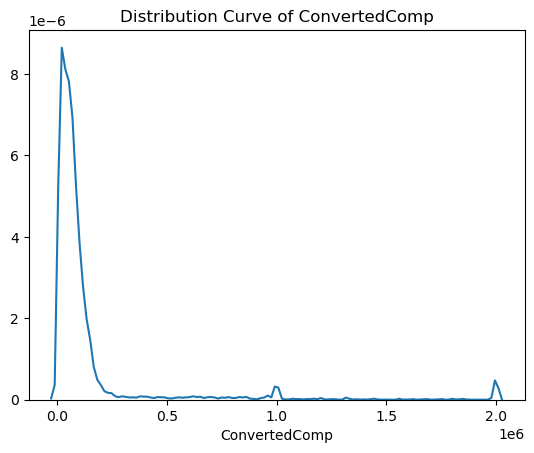

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False)
plt.title('Distribution Curve of ConvertedComp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Histogram of ConvertedComp')

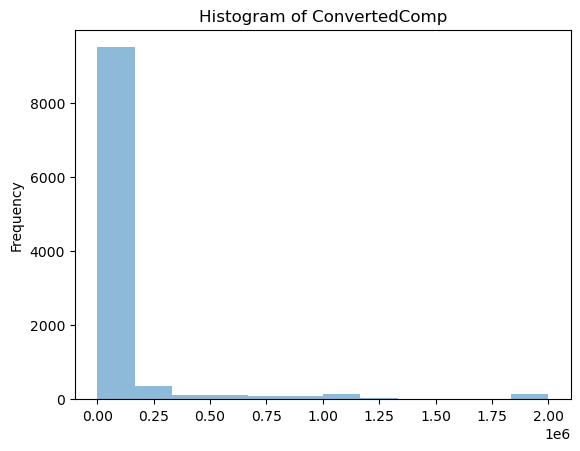

In [15]:
ax = df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram of ConvertedComp')

What is the median of the column `ConvertedComp`?


In [17]:
print('the median ConvertedComp is',df['ConvertedComp'].median())

the median ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [19]:
print(df['Gender'].value_counts())

print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

 10480 respondents identify as "Man"


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
print('The median ConvertedComp of responders identifying only as "Woman" is', \
      df[df['Gender'].eq('Woman')]['ConvertedComp'].median())

The median ConvertedComp of responders identifying only as "Woman" is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
df['Age'].describe().loc[['min','25%','50%','75%','max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Histogram of Age')

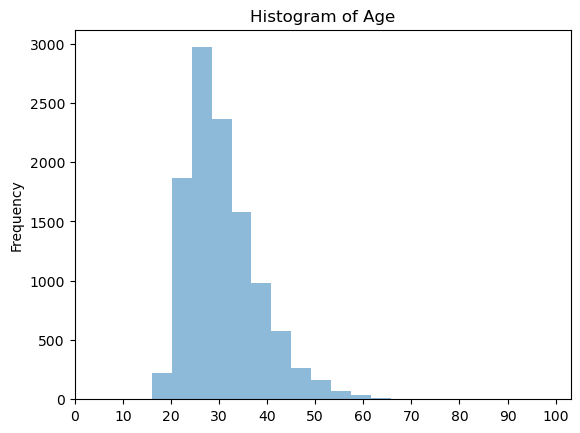

In [35]:
df['Age'].plot.hist(bins=20, xticks=range(0,110,10), alpha=0.5)
plt.title('Histogram of Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

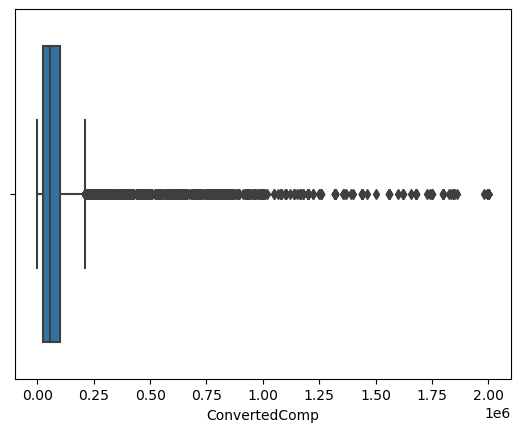

In [39]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [41]:
df['ConvertedComp'].describe()

q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
IQR = q3 - q1
print('The interquartile range is',IQR)

The interquartile range is 73132.0


Find out the upper and lower bounds.


In [42]:
upper = df['ConvertedComp'].min()
lower = df['ConvertedComp'].max()
print('The lower bound is',lower, 'and the upper bound is', upper)

The lower bound is 2000000.0 and the upper bound is 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [45]:
print('Outliers below lower bound:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above upper bound:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())

#for the quiz on outliers:
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())

Outliers below lower bound: 0
Outliers above upper bound: 0
Median with outliers: 52704.0
Median with outliers removed: 52704.0
Mean with outliers removed: 59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
#removing outliers and null values from the dataframe
print(df.shape)
df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print(df.shape)

(9703, 85)
(9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [46]:
df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
